In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal
import cmath

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (12, 8),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params) 



from IPython.display import Image
import sys 
sys.path.insert(0,'/home/aalmela/scm/git/utn/eaiii/2019/lib/')



In [2]:
def Linvill(yt):
    y11 = yt[0,0]
    y12 = yt[0,1]
    y21 = yt[1,0]
    y22 = yt[1,1]
    C = (abs(y12*y21)+(y12*y21).real)/(2*y11.real*y22.real)
    print('###############  LINVILL   #####################')
    print( 'coeficiente de linvill C= {:4.2F}' .format(C))
    if C < 1:
        print( 'Es incondicionalmente estable')
    else :
        print( 'Es potencialmente inestable')
    return C

def Stern(yg, yl, yt):
    y11 = yt[0,0]
    y12 = yt[0,1]
    y21 = yt[1,0]
    y22 = yt[1,1]
    K = (2*(y11.real+yg.real)*(y22.real+yl.real)) / (abs(y12*y21)+(y12*y21).real)
    print('###############  STERN   #####################')
    print( 'coeficiente de stern K= {:4.2F}' .format(K))
    if K > 1:
        print( 'Estable')
    else :
        print( 'Inestable')
    return K


def neutraliza(yt,wo,Cn, N):
    Nn = (-yt[0,1].imag)/(wo*Cn)*N
    y11 =  wo*Cn*1j
    y12 =  wo*Cn*1j*(Nn/N)
    y21 =  wo*Cn*1j*(Nn/N)
    y22 =  wo*Cn*1j*(Nn/N)**2
    yn  = np.matrix([[y11, y12],[ y21, y22]])
    # cuadripolo resultante
    ytn  = yt + yn
    print('n=', Nn/N)
    return (ytn,Nn)

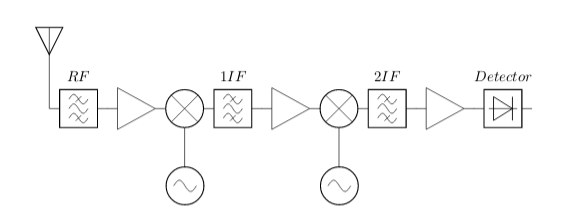

In [3]:

Image(filename= "fig/receptor.png",width=450)

El circuito de la figura corresponde a un receptor de Banda Aeronáutica ($118\,MHz$ a $137\,MHz$).  
Está sintonizado para recibir una señal AM de portadora de  $F_c = 120\,MHz$ y modulado al 50\%  por un tono único de $1\,KHz$. 
Se recibe a la salida del detector relación señal a ruido $SNR = 20\,dB$.


Los canales adyacentes se encuentran a $50\,KHz$ por arriba y debajo de la portadora de $120\,MHz$.


Una señal interferencia en la frecuencia imagen, con una amplitud $20\,dB$ por encima de la señal deseada (medida en bornes de antena), aparece a la entrada del detector $20\,dB$ por debajo de la deseada.

El receptor tiene una respuesta espuria en $119.09\,MHz$ con un rechazo de $60\,dB$ respecto de la portadora de $120\,MHz$.

Suponer que todos los elementos activos (Amplificadores, mezclador y detector) son lineales y de parámetros constantes dentro de toda la banda de interés. 


#### Circuitos

Para el diseño de los circuitos considerar los siguientes parámetros. 


|Frecuencia | $y_{ie}$          | $y_{re}$          | $y_{fe}$          | $y_{oe}$          | Unidad |
|-----------|-------------------|-------------------|-------------------|-------------------|--------|
|455 kHz    | $0.5 + j\, 0.05 $ | $ - j\, 0.001$    | $40 - j\, 0.1$    | $0.05 + j\, 0.01$ | mS     |
|10,7 MHz   | $1.0+j\, 2.0$     | $ - j\, 0.1$      | $40 - j\, 1.0$    | $0.1 + j\, 0.4$   | mS     |
|120 MHz    | $2.0+j\, 10.0$    | $ -0.1 - j\, 1.0$ | $30 - j\, 20$     | $0.5 + j\, 2$     | mS     |


Todos los tanques están adaptados a transferencia de energía a Q constate. Para los cálculos despreciar las capacidades del transistor solo si son despreciables respecto al capacitor de sintonía.  

##### Etapa RF.

La antena presenta una impedancia $R_{a}= 50 \Omega$ en toda la banda de interés y tiene una temperatura de ruido de $500\,K$. 

El transistor presenta $1,5\,dB$ de cifra de ruido en el punto de operación.  



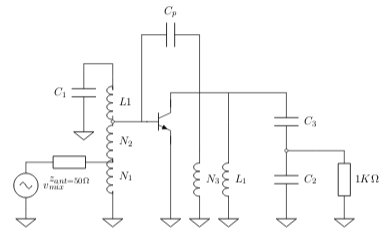

In [102]:
Image(filename= "fig/RF.png",width=450)

Las bobinas empleadas para el amplificador de RF poseen : $Q_{oL} = 100$ y $N = 20$ espiras.
Capacitores con $Q_{oC} = \infty$. 


#### Etapa 1IF.






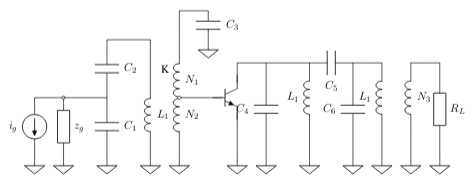

In [103]:
Image(filename= "fig/primeraFI.png",width=450)

Primera FI (Amplificador + filtro): Dos etapas dobles sintonizadas sincrónicas con acoplamiento crítico

Los transistor presentan $3\,dB$ de cifra de ruido en el punto de operación.


Para el cálculo de estabilidad suponer comportamiento de simple sintonizado, empleando la impedancia que presenta el doble sintonizado (similar a el cálculo de adaptación).

Las bobinas empleadas para el amplificador de 1FI poseen : $Q_{oL} = 100$ y $N = 100$ espiras.
Capacitores con $Q_{oC} = \infty$.


#### Etapa 2IF.

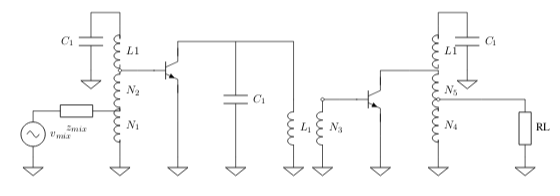

In [104]:
Image(filename= "fig/segundaFI.png",width=450)

In [ ]:
Image(filename= "fig/segundaFI.png",width=450)

Segunda FI: 3 etapas Simple Sintonizadas en configuración Butterworth, con frecuencia central de $455\,KHz$ y ancho de  banda $10\,KHz$. 



Los transistor presentan $2\,dB$ de cifra de ruido en el punto de operación. El ancho de banda equivalente puede ser calculado empleando la simplificación propuesta en la figura.



Las bobinas empleadas para el amplificador de 2FI poseen : $Q_{oL} = 120$ y $N = 300$ espiras.
Capacitores con $Q_{oC} = \infty$.


#### Mezcladores.

Primer oscilador local: senoide pura de $109.3\,MHz$.

Segundo OL: Senoide pura de $10.245\,MHz$.


Los parámetros del mezclador:

| Símbolo   | Parametro               | typ | Unidad    |
|-----------|-------------------------|-----|-----------|
| $f_{i}$   | Frecuencia de entrada   | 500 | MHz       |
| $f_{osc}$ | Frecuancia de oscilador | 200 | MHz       |
| $R_{in}$  | Resistencia de entrada  | 1   | $K\Omega$ |
| $R_{out}$ | Resistencia de salida   | 1   | $K\Omega$ |
| $G_{c}$   | Ganancia de conversión  | 12  | dB        |



###  Determine

1. Para la etapa de RF, $Qc$ de los sintonizados para cumplir con la condición de filtros sincrónicos y $Q_{c2} = 2 \cdot Q_{c1} $  .

2. Dado que el transistor es potencialmente inestable ($C= 6.62$, coeficiente de Linvill), se propuso una red de neutralización. Calcular el número de espiras de la red de neutralización. Calcular los parámetros resultantes (transistor y red de neutralización) y el coeficiente de Stern resultante para la condición de máxima transferencia de energía a Q constante.   

3. El valor de los componentes de la etapa de RF.

4. Proponga alguna modificación para que la red sea de unilateralización, calcule los componentes de la nueva red y el coeficiente de Stern resultante.
 

  
5. Q y h de los resonadores de Primera FI

6. Calcular el coeficiente de Linvill. En caso de ser potencialmente inestable, proponer una red de neutralización.    
    
7. Calcular los parámetros resultantes (transistor y red de neutralización), teniendo en cuenta la red de neutralización en caso de ser necesaria, empleando $C_{p} = 5 pF$ y el coeficiente de Stern resultante para la condición de máxima transferencia de energía a Q constante.

8. Q y frecuencia central de cada uno de los resonadores de Segunda FI.

9. Calcular coeficiente de Linvill. En caso de ser potencialmente inestable, proponer una red de neutralización. Si es incondicionalmente estable, calcular el coeficiente de Stern para la condición de máxima transferencia de energía a Q constante.  

10. Rechazo de canal adyacente. 


#### Respuestas

1. Para la etapa de RF, $Qc$ de los sintonizados para cumplir con la condición de filtros sincrónicos y $Q_{c2} = 2 \cdot Q_{c1} $  .

$\frac{1}{\sqrt{1+Q_1^2\cdot(\frac{fi}{fo}-\frac{fo}{fi})^2}} \cdot \frac{1}{\sqrt{1+Q_2^2\cdot(\frac{fi}{fo}-\frac{fo}{fi})^2}} = \frac{1}{10^{\frac{40}{20}}}$


$\frac{1}{\sqrt{1+Q_1^2\cdot(\frac{fi}{fo}-\frac{fo}{fi})^2}} \cdot \frac{1}{\sqrt{1+(2\cdot Q_1)^2\cdot(\frac{fi}{fo}-\frac{fo}{fi})^2}} = \frac{1}{10^{\frac{40}{20}}}$

$ (1+Q_1^2\cdot(\frac{fi}{fo}-\frac{fo}{fi})^2) \cdot (1+ 4\cdot Q_1^2\cdot(\frac{fi}{fo}-\frac{fo}{fi})^2) = 100^2$

$ 1 + 5\cdot Q_1^2\cdot(\frac{fi}{fo}-\frac{fo}{fi})^2 + 4\cdot Q_1^4\cdot(\frac{fi}{fo}-\frac{fo}{fi})^4 = 10000$

$ f_i = f_{osc} - f_{1FI} = 109.7 MHz - 10.7 MHz = 98.6 MHz $

$(\frac{fi}{fo}-\frac{fo}{fi})^2 = (\frac{98.6}{120}-\frac{120}{98.6})^2 = 0.1563$

$ - 9999 + 5\cdot Q_1^2\cdot(0.1563) + 4\cdot Q_1^4\cdot(0.1563)^2 = 0$



In [39]:
df =  (98.6/120-120/98.6)**2 

c = -9999
b = 5*df
a = 4*df**2

d = b**2-4*a*c
if d > 0: x = (-b+ (b**2-4*a*c)**0.5 )/(2*a)
else    : x = (-b+ (b**2+4*a*c)**0.5 )/(2*a)

Q1 = x**0.5
Q2 = Q1 * 2

print(Q1 ,  Q2)

17.77272285988902 35.54544571977804


2. Dado que el transistor es potencialmente inestable ($C= 6.62$, coeficiente de Linvill), se propuso una red de neutralización. Calcular el número de espiras de la red de neutralización. Calcular los parámetros resultantes (transistor y red de neutralización) y el coeficiente de Stern resultante para la condición de máxima transferencia de energía a Q constante.




In [58]:
fo = 120e6
wo= 2*np.pi*fo
Cp = 5e-12
# Parametros del transistor 120 MHz
y11 =   2.0e-3 + 10.0e-3*1j
y12 = - 0.1e-3 -  1.0e-3*1j
y21 =  30.0e-3 - 20.0e-3*1j 
y22 =   0.5e-3 +  2.0e-3*1j


yt  = np.matrix([[y11, y12],[ y21, y22]])

Linvill(yt)


# Calculo de n
ytn, Np =  neutraliza(yt,wo,Cp,20)
print(Np)

print(ytn)

yl= (ytn[1,1].real-ytn[1,1].imag*1j)

yg = (ytn[0,0].real-ytn[0,0].imag*1j)

K = Stern(yg, yl, ytn)

print(K)

###############  LINVILL   #####################
coeficiente de linvill C= 6.62
Es potencialmente inestable
n= 0.265258238486
5.30516476973
[[ 0.0020+0.01376991j -0.0001+0.j        ]
 [ 0.0300-0.019j       0.0005+0.00226526j]]
###############  STERN   #####################
coeficiente de stern K= 14.52
Estable
14.5175760242


3. El valor de los componentes de la etapa de RF.



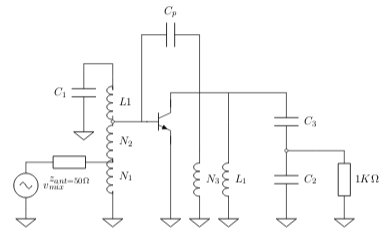

In [57]:
Image(filename= "fig/RF.png",width=450)

In [79]:
Qo = 100
ro = 1/ytn[1,1].real 

L1 = (1/Q2-1/Qo)*(ro/2)/wo

C1 = 1/(wo**2*L1)

# divisor Cap

Qm2 = ro * wo * C1

print(Qm2)

N = (ro/1e3)**0.5
Qm1 = Qm2/N

print(Qm1)

C3 = C1*N
C2 = C1*N/(N-1)

print(C1,C3,C2)

rt = 2/( (1/Q1-1/Qo)/(L1*wo))

# 50/rt = (N1/N)^2

N1 = (50/rt)**0.5 * 20

print(N1)

ri =  1/ytn[0,0].real

N2 = (ri/rt)**0.5 * 20 - N1

print(N2)



110.296149331
77.9911551307
7.31424057085e-11 1.03438982138e-10 2.49723793554e-10
5.05121841406
10.9221367334


4. Proponga alguna modificación para que la red sea de unilateralización, calcule los componentes y el coeficiente de Stern resultante.



5. Q y h de los resonadores de Primera FI.

En segunda FI, la frecuencia imagen esta en $97.9\,MHz$, que corresponde a la frecuencia de $119.09\,MHz$.

$\frac{1}{1+\frac{\chi^4}{4}} = \frac{1}{10^{\frac{60}{20}}}$





In [96]:
fo = 10.7e6
wo = 2* np.pi*fo

X = ((10**3-1)*4)**(1/4)

print(X)

Q = X*fo/2/(fo-9.79e6)

print(Q)

h = 1

7.950718364847068
46.743234342782216


6. Calcular el coeficiente de Linvill. En caso de ser potencialmente inestable, proponer una red de neutralización.

In [99]:
fo = 10.7e6
wo = 2*np.pi*fo


y11 =   1.00e-3 + 2.00e-3*1j
y12 = - 0.00e-3 - 0.10e-3*1j
y21 =  40.00e-3 - 1.00e-3*1j 
y22 =   0.10e-3 + 0.400e-3*1j

yt  = np.matrix([[y11, y12],[ y21, y22]])

Linvill(yt)




###############  LINVILL   #####################
coeficiente de linvill C= 19.51
Es potencialmente inestable
n= 0.297485874938
29.7485874938
[[ 0.0010 +2.33615041e-03j  0.0000 -1.35525272e-20j]
 [ 0.0400 -9.00000000e-04j  0.0001 +4.29748587e-04j]]


7. Calcular los parámetros resultantes (transistor y red de neutralización), teniendo en cuenta la red de neutralización en caso de ser necesaria, empleando $C_{p} = 5 pF$ y el coeficiente de Stern resultante para la condición de máxima transferencia de energía a Q constante.

In [100]:
# Calculo de n
ytn, Np =  neutraliza(yt,wo,5e-12,100)
print(Np)

print(ytn)

yl= (ytn[1,1].real-ytn[1,1].imag*1j)

yg = (ytn[0,0].real-ytn[0,0].imag*1j)



n= 0.297485874938
29.7485874938
[[ 0.0010 +2.33615041e-03j  0.0000 -1.35525272e-20j]
 [ 0.0400 -9.00000000e-04j  0.0001 +4.29748587e-04j]]


8. Q y frecuencia central de cada uno de los resonadores de Segunda FI.




In [112]:
fo = 455e3
wo = 2*np.pi*fo
bw = 10e3

Q1 = fo/bw /(np.sin( (2*1-1)*np.pi/(2*3) ) )
f1 = fo + bw/2*np.cos((2*1-1)*np.pi/(2*3) ) 

Q2 = fo/bw /(np.sin( (2*2-1)*np.pi/(2*3) ) )
f2 = fo + bw/2*np.cos((2*2-1)*np.pi/(2*3) ) 

Q3 = fo/bw /(np.sin( (2*3-1)*np.pi/(2*3) ) )
f3 = fo + bw/2*np.cos((2*3-1)*np.pi/(2*3) ) 


print(Q1,Q2,Q3)
print(f1,f2,f3)

91.0 45.5 91.0
459330.127019 455000.0 450669.872981


9. Calcular coeficiente de Linvill. En caso de ser potencialmente inestable, proponer una red de neutralización. Si es incondicionalmente estable, calcular el coeficiente de Stern para la condición de máxima transferencia de energía a Q constante. 

In [114]:
fo = 455e3
wo = 2*np.pi*fo


y11 =   0.50e-3 + 0.050e-3*1j
y12 = - 0.00e-3 - 0.001e-3*1j
y21 =  40.00e-3 - 0.100e-3*1j 
y22 =   0.05e-3 + 0.010e-3*1j

yt  = np.matrix([[y11, y12],[ y21, y22]])

Linvill(yt)



###############  LINVILL   #####################
coeficiente de linvill C= 0.80
Es incondicionalmente estable


0.79800249999609374

10. Rechazo de canal adyacente. 


In [116]:
fca = fo + 50e3 

A1 = 1/(1+Q1**2*(fca/f1-f1/fca )**2 )**0.5
A2 = 1/(1+Q1**2*(fca/f2-f2/fca )**2 )**0.5
A3 = 1/(1+Q1**2*(fca/f3-f3/fca )**2 )**0.5

A = A1 * A2 * A3

print(A, 20*np.log10(A))

0.000146039355742 -76.7106018325
